## Case_Study #06, Preprocessing
### Sreelekshmy S L
### NDSA_B4

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the dataset into python environment


In [2]:
titanic_data = pd.read_csv('titanic_dataset.csv')

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Make ‘PassengerId’ as the index column


#### Use .set_index to set an existing column as the index

In [4]:
titanic_data.set_index('PassengerId',inplace=True)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset


In [5]:
titanic_data.shape

(891, 11)

#### There are 891 rows and 11 columns in the data.

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### The data types are assigned correctly.

In [7]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### There are three columns with null values: Age,Cabin and Embarked. 

#### Now we find the summary of all numerical columns

In [8]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

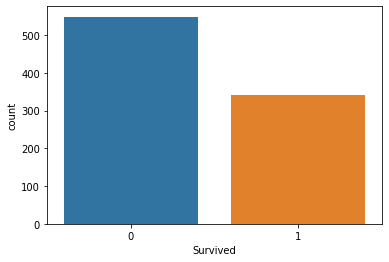

In [9]:
sns.countplot(x=titanic_data['Survived'])

### There are details of 340 people who survived the Titanic shipwreck and 549 who didn't.

##  4. Fill in all the missing values present in all the columns in the dataset

#### Check for null values.

In [10]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### The columns Age, Cabin and Embarked have null values in them, the largest number is 687 for Cabin and the smallest number is 2 for Embarked

### Now let's check each column seperately and decide whether to drop or impute them.

### a) Age

In [11]:
titanic_data['Age'].isnull().sum()

177

In [12]:
perc = titanic_data['Age'].isnull().sum()/titanic_data.shape[0]  *100
print('The percentage of null values in Age = ',perc)

The percentage of null values in Age =  19.865319865319865


<AxesSubplot:xlabel='Age', ylabel='Density'>

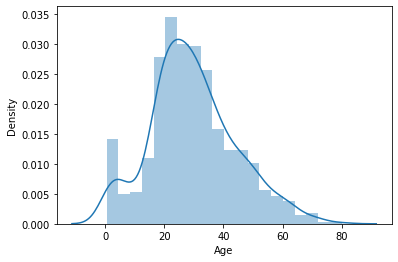

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(titanic_data['Age'])

### Since there are 177 null values which makes around 20% of the data , we are not going to drop them instead we fill them with the median value of age since the histogram shows skewness in data.

In [14]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

In [15]:
titanic_data['Age'].isnull().sum()

0

### b) Embarked

In [16]:
titanic_data['Embarked'].isnull().sum()

2

In [17]:
perc = titanic_data['Embarked'].isnull().sum()/titanic_data.shape[0]  *100
print('The percentage of null values in Embarked = ',perc)

The percentage of null values in Embarked =  0.22446689113355783


### Here ther are only 2 values missing which is just 0.2% of total data, we will fill it with mode of the column

In [18]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [19]:
titanic_data['Embarked'].isnull().sum()

0

### c) Cabin

In [20]:
titanic_data['Cabin'].isnull().sum()

687

In [21]:
perc = titanic_data['Cabin'].isnull().sum()/titanic_data.shape[0]  *100
print('The percentage of null values in Cabin = ',perc)

The percentage of null values in Cabin =  77.10437710437711


### Since there are 891 rows and out of which 687 are missing cabin data , which accounts for 77% of the data, it is better to drop the column as filling it with the same value is not reasonable.

In [22]:
titanic_data.drop('Cabin',inplace=True,axis=1)

#### The null values are completely filled

In [23]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### So we basically removed all the null values .

## 5. Check and handle outliers in at least 3 columns in the dataset

### A) Fare

#### Check the outliers using boxplot

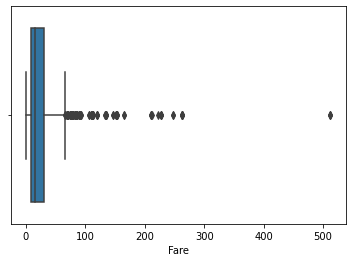

In [24]:
sns.boxplot(x=titanic_data['Fare']);

### Many outliers found in Fare column.<br> Now use interquartile range method to find values above and below a certain limit.

In [25]:
Q1 = np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(titanic_data['Fare'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR


In [26]:
outlier = []
for x in titanic_data['Fare']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
print('Total number of outliers in column Fare = ',len(outlier)  )

Total number of outliers in column Fare =  116


### There are 114 outliers in the data. Now let's grab these specific data index and store it in a variable named 'ind'.

In [27]:
out_data = titanic_data['Fare'] > up_limit
ind=titanic_data.loc[out_data].index

### Now plot the histogram of Fare column to understand the skewness and to decide how to replace the values.

<AxesSubplot:ylabel='Density'>

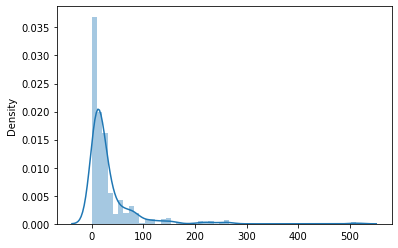

In [28]:
sns.distplot(x=titanic_data['Fare'])

### The Fare variable is left skewed. And since it is not wise to assign the overall median to the outliers, let us take the median of Fare for each Pclass group and then assign it to the outliers

In [29]:
df=titanic_data.groupby('Pclass')
for i in range(1,4):
    out_data=(titanic_data['Fare'] > up_limit) & (titanic_data['Pclass']==i)
    ind=titanic_data.loc[out_data].index
    titanic_data.loc[list(ind),'Fare']=df.get_group(i)['Fare'].median()

#### Now again plot the boxplot

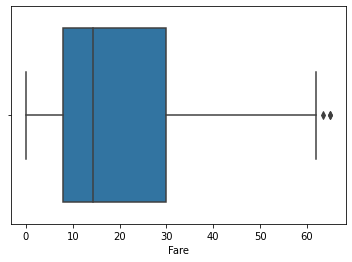

In [30]:
sns.boxplot(x=titanic_data['Fare']);

### All the outliers in the column Fare are thus gone.
### B) Age

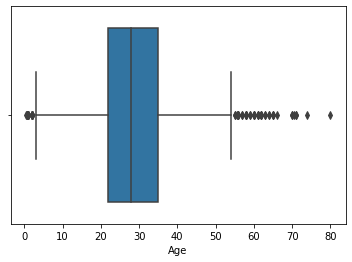

In [31]:
sns.boxplot(x=titanic_data['Age']);

In [32]:
titanic_data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### We can see there are people from age 0 upto age 80, but a great sum of people are around age 20 to 35. Since this is not an odd case and the age does have effect on a person's survival we will leave the outliers as it is.

### C) SibSp

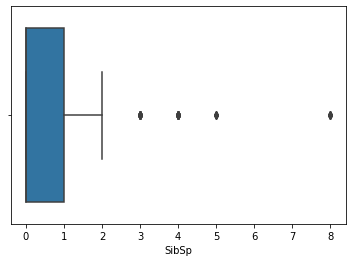

In [33]:
sns.boxplot(x=titanic_data['SibSp']);

### The SibSp column represents the number of siblings or spouses on board so this data can't be removed or replaced

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### First let us seperate out X and y from the data set. 

In [34]:
X = titanic_data.drop(['Survived'],axis=1)
y = titanic_data['Survived']


### Now let us apply the min-max scaling to X 

In [35]:
from sklearn import preprocessing 
# create instance of min-max from preprocesing anf feature range  to which the data should assign to
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

### Fit transform only the numerical columns with continuous values.

In [36]:
X[['Age','Fare']] = min_max.fit_transform(X[['Age','Fare']])

### Now let us see the final data after applying the preprocessing techniques of dealing with missing data, outliers and scaling 

In [37]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.111538,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.927500,C
3,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.121923,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.816923,S
5,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.123846,S
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.200000,S
888,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.461538,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.346569,1,2,W./C. 6607,0.360769,S


## Extra

### For X I am going to drop all the unnecessary columns such as Ticket,Name and the target variable Survived.<br>Also one-hot encode the categorical variables

In [38]:
X= pd.get_dummies(X.drop(['Name','Ticket'],axis=1))
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0.271174,1,0,0.111538,0,1,0,0,1
2,1,0.472229,1,0,0.927500,1,0,1,0,0
3,3,0.321438,0,0,0.121923,1,0,0,0,1
4,1,0.434531,1,0,0.816923,1,0,0,0,1
5,3,0.434531,0,0,0.123846,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,0.334004,0,0,0.200000,0,1,0,0,1
888,1,0.233476,0,0,0.461538,1,0,0,0,1
889,3,0.346569,1,2,0.360769,1,0,0,0,1


### Let us split the data into train and test data and fit a linear regression model.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=lr.fit(X_train,y_train)
predictions = model.predict(X_test)


### And let us evaluate the model and the min-max scale using mean_squared_error and R^2 values.

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE = ', mean_squared_error(y_test,predictions))
print('R^2 value is = ',r2_score(y_test,predictions) )

MSE =  0.13328608110062884
R^2 value is =  0.45037074330176974


## End